eight (8) quality issues and two (2) tidiness issues

In [1]:
import pandas as pd
import numpy as np
import requests as req
import json
import tweepy
import timeit
import datetime

# conda install -c conda-forge tweepy 

pd.set_option('display.max_colwidth', -1)

# 1. Gathering the Data

### 1st part of data

**The WeRateDogs Twitter archive**

In [2]:
df_twitter_archive_enhanced = pd.read_csv('./twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
tweet_ids = df_twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

### 2nd part of data

**Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.**

In [5]:
consumer_key = 'oGCZjHxAXxZ6Q5kkffszAY2SG'
consumer_secret = 'H27T3vRAfE7AhS6SF5bvOTOXunFTPmRbkFlNzgKLYsiJNSw9ge'
access_token = '760271056573636608-ZoH6PK6RnP98oyvKkn131VvWQlY0zF7'
access_secret = 'gXn8iExjHYXz785vRcJ94fZQQVmQEJo65HwymHAqG6kRz'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = a = datetime.datetime.now()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
        
end = datetime.datetime.now()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
print(fails_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 827228250799742977: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 812747805718642688: TweepError([{'code': 144, 'message': 'N

In [9]:
df_tweet_json_data = pd.DataFrame(columns = ['tweet_id', 'num_of_retweets', 'num_of_favorites'])

# open the TXT file programmatically
with open('tweet_json.txt') as tweet_file:
    for line in tweet_file:
        # load its contents line by line, i.e. JSON object by JSON object
        tweet = json.loads(line)
        if ((tweet['in_reply_to_status_id'] == None) & (tweet['in_reply_to_user_id'] == None)): # if it's not a retweet or reply
            id_string = tweet['id_str']
            retweet_count = tweet['retweet_count']
            favorite_count = tweet['favorite_count']
            
            # store the additional needed information into a dataframe
            df_tweet_json_data = df_tweet_json_data.append({'tweet_id' : id_string,
                                                            'num_of_retweets' : retweet_count,
                                                            'num_of_favorites' : favorite_count}, 
                                                           ignore_index = True)
        else:
            continue
            


In [10]:
df_tweet_json_data.to_csv('tween_json_data.csv',index=False)

In [11]:
df_tweet_json_data = pd.read_csv('tween_json_data.csv')
df_tweet_json_data.head()

,tweet_id,num_of_retweets,num_of_favorites
0,892420643555336193,8257,37850
1,892177421306343426,6101,32524
2,891815181378084864,4039,24484
3,891689557279858688,8408,41202
4,891327558926688256,9106,39376


### 3rd part of data

**The tweet image predictions**

In [12]:
try:
    response = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
except Exception as e:
    print(e)
    
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [13]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_image_predictions.to_csv('image_predictions.csv', index=False)

In [15]:
df_image_predictions = pd.read_csv('image_predictions.csv')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 2. Assessing data


#### Data Quality Dimensions
1. `Completeness` do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
2. `Validity` we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
3. `Accuracy` inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
4. `Consistency`  inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

### Visual Assessing

The WAD project dataset comes in three tables: twitter-archive-enhanced.csv, tween_json_data.csv, image_predictions.csv


Open tables using **Excel**  and find issues as below:


### Quality issues:

#### `twitter-archive-enhanced` table

1. column `expanded_urls`: same url repeats a few times.
2. column `text`: mixed the text, rates, links together.

#### `tween_json_data` table

- No

#### `image_predictions` table

- No


### Programmatic assessment

- .head (DataFrame and Series)
- .tail (DataFrame and Series)
- .sample (DataFrame and Series)
- .info (DataFrame only)
- .describe (DataFrame and Series)
- .value_counts (Series only)
- Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

In [16]:
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')
df_json = pd.read_csv('tween_json_data.csv')
df_predictions = pd.read_csv('image_predictions.csv')

In [17]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_dogs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
type(df_dogs['timestamp'][0])

str

In [20]:
type(df_dogs['name'][0])

str

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def check_is_real_name(names):
    no_name = []
    sw = nltk.corpus.stopwords.words('english')
    
    for name in names:
        if name in sw:
            no_name.append(name)
            
    for no in no_name:
        print(no, end=",")
    
    return no_name

In [23]:
not_a_name_array = check_is_real_name(df_dogs.name)

such,a,not,a,an,very,a,very,just,my,not,his,a,a,a,an,very,a,just,very,this,all,a,a,a,a,a,an,a,a,very,just,a,the,the,by,a,a,the,the,a,a,a,a,a,a,a,a,just,a,the,a,a,a,a,a,a,a,a,a,an,a,the,a,a,a,a,a,a,a,a,a,a,a,a,an,a,an,the,the,a,a,an,a,a,a,a,

In [24]:
df_not_a_name = pd.DataFrame(not_a_name_array)
df_not_a_name.head(1)

,0
0,such


In [25]:
df_not_a_name[0].str.split(expand=True).stack().value_counts()

a       55
the     8 
an      7 
very    5 
just    4 
not     2 
his     1 
such    1 
all     1 
this    1 
by      1 
my      1 
dtype: int64

In [26]:
df_not_a_name.to_csv('not_a_name_in_dogs.csv')

In [27]:
df_dogs.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [28]:
pd.set_option('display.max_colwidth', 120)
df_dogs.query('rating_denominator != 10')['text']

313                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                    @docmisterio account started on 11/15/15
433                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this l...
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ...
902                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP...
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at onc

In [29]:
df_dogs[df_dogs.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 3 columns):
tweet_id            2263 non-null int64
num_of_retweets     2263 non-null int64
num_of_favorites    2263 non-null int64
dtypes: int64(3)
memory usage: 53.1 KB


In [31]:
df_json[df_json.tweet_id.duplicated()]

,tweet_id,num_of_retweets,num_of_favorites


In [32]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [34]:
df_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
122,668221241640230912,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,chow,0.395101,True,golden_retriever,0.372115,True,Labrador_retriever,0.148785,True
1841,838083903487373313,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
1661,811744202451197953,https://pbs.twimg.com/media/C0PlCQjXAAA9TIh.jpg,1,Pekinese,0.386082,True,Labrador_retriever,0.202862,True,golden_retriever,0.170487,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,West_Highland_white_terrier,0.586173,True,borzoi,0.206620,True,Great_Pyrenees,0.060653,True


In [36]:
df_predictions[df_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues:

#### `twitter-archive-enhanced` table

3. tweet_id is an int not a string
- timestamp, retweeted_status_timestamp are a string not datatime
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float not string
- name column: a, an, the, all, ... is not a name
- column `doggo`, `floofer`, `pupper`, `puppo`: NaN instead of None
- column `rating_denominator`: some is not 10. Some is extracted date from column `text` as the denominator, some is user irregular rating error.


#### `tween_json_data` table




#### `image_predictions` table

1. tweet_id is an int type not string
2. colomn `p1`,`p2`,`p3`: the initial letter of predicted race, some are lower case, some are captital letter 
3. colomn `p1`,`p2`,`p3`: mixed ***-*** and ***_*** For example: curly-coated_retriever


### Tidiness
1. In this preject, we are only interested in the original ratings (no retweets) that have images. So there is no need keep column related to 'retweet'.
- tween_json_data table and twitter-archive-enhanced table are all about tweeter, so maybe need combine into one table.


# 3. Cleaning data

In [37]:
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')
df_json = pd.read_csv('tween_json_data.csv')
df_predictions = pd.read_csv('image_predictions.csv')

In [38]:
# Make a copy to clean
df_dogs_clean = df_dogs.copy()
df_json_clean = df_json.copy()
df_predictions_clean = df_predictions.copy()

## Fix Quality Problems

### Define (1)

-. Drop off retweet related columns

In [39]:
df_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Code

In [40]:
for col in ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"]:
    df_dogs_clean.drop(col, axis=1, inplace=True)

### Test

In [41]:
df_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [42]:
df_dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. ...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688...",12,10,Franklin,None,None,None,None


### Define (2)

- Convert `tweet_id` column's data type from an int to a string using astype
- Convert `in_reply_to_status_id`, `in_reply_to_user_id` columns' data type from a float to a string
- Convert `timestam`p column's data type from a string to a datatime using to_datatime


In [43]:
df_dogs_clean.tweet_id.head(2)

0    892420643555336193
1    892177421306343426
Name: tweet_id, dtype: int64

In [44]:
df_json_clean.tweet_id.head(2)

0    892420643555336193
1    892177421306343426
Name: tweet_id, dtype: int64

In [45]:
df_predictions_clean.tweet_id.head(2)

0    666020888022790149
1    666029285002620928
Name: tweet_id, dtype: int64

In [46]:
df_dogs_clean.in_reply_to_status_id.head(2)

0   NaN
1   NaN
Name: in_reply_to_status_id, dtype: float64

In [47]:
df_dogs_clean.timestamp.head(2)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
Name: timestamp, dtype: object

### Code

In [48]:
# Convert type
df_dogs_clean.tweet_id = df_dogs.tweet_id.astype(str)


In [49]:
df_json_clean.tweet_id = df_json.tweet_id.astype(str)


In [50]:
df_predictions_clean.tweet_id = df_predictions.tweet_id.astype(str)


In [51]:
df_dogs_clean.in_reply_to_status_id = df_dogs_clean.in_reply_to_status_id.astype(str)
df_dogs_clean.in_reply_to_user_id = df_dogs_clean.in_reply_to_user_id.astype(str)

In [52]:
df_dogs_clean.timestamp = pd.to_datetime(df_dogs.timestamp)


### Test

In [53]:
type(df_dogs_clean['tweet_id'][0])

str

In [54]:
type(df_dogs_clean['in_reply_to_status_id'][0])

str

In [55]:
df_dogs_clean.timestamp.head(1)

0   2017-08-01 16:23:56
Name: timestamp, dtype: datetime64[ns]

### Define (3)
- Change the `name` column's value "a, an, ..." to None

In [56]:
df_dogs_clean.name.sample(10)

1979       None
2328       None
1196     Flávio
220      Boomer
741        Bell
1668       None
288     Stanley
2222          a
368       Fiona
2185       Ruby
Name: name, dtype: object

### Code

In [57]:
df_not_a_name=pd.read_csv('not_a_name_in_dogs.csv')

In [58]:
df_dogs_clean.loc[(df_dogs_clean.name.isin(list(df_not_a_name))), 'name'] = None  

### Test

In [59]:
df_dogs_clean.loc[(df_dogs_clean.name.isin(list(df_not_a_name))), 'name']

Series([], Name: name, dtype: object)

###  Define (4)
- Change the columns `doggo`, `floofer`, `pupper`, `puppo` value None into Nan(.np.Nan)

In [60]:
df_dogs_clean[['doggo','floofer','pupper','puppo']].head(5)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


### Code

In [61]:
df_dogs_clean.doggo.replace('None',np.NaN, inplace=True)
df_dogs_clean.floofer.replace('None',np.NaN, inplace=True)
df_dogs_clean.pupper.replace('None',np.NaN, inplace=True)
df_dogs_clean.puppo.replace('None',np.NaN, inplace=True)

### Test

In [62]:
df_dogs_clean[['doggo','floofer','pupper','puppo']].sample(10)

,doggo,floofer,pupper,puppo
899,doggo,NaN,NaN,NaN
785,NaN,NaN,NaN,NaN
444,NaN,NaN,pupper,NaN
1020,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN
1347,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN
1326,NaN,NaN,NaN,NaN
121,doggo,NaN,NaN,NaN
2347,NaN,NaN,NaN,NaN


### Define (5)

***`image_predictions`*** table


- Change all of the colomn `p1`,`p2`,`p3` the initial letter to captital letter
- Replace `p1`,`p2`,`p3` colomn's value `-` to `_` 

In [63]:
df_predictions_clean[['p1','p2','p3']].sample(5)

,p1,p2,p3
1093,home_theater,window_shade,bathtub
1134,window_shade,studio_couch,rotisserie
503,wood_rabbit,hare,Cardigan
1314,golden_retriever,Labrador_retriever,cocker_spaniel
522,seat_belt,Boston_bull,French_bulldog


### Code

In [64]:
df_predictions_clean.p1 = df_predictions_clean.p1.str.title()
df_predictions_clean.p2 = df_predictions_clean.p2.str.title()
df_predictions_clean.p3 = df_predictions_clean.p3.str.title()

In [65]:
df_predictions_clean.p1 = df_predictions_clean.p1.str.replace('-','_')
df_predictions_clean.p2 = df_predictions_clean.p2.str.replace('-','_')
df_predictions_clean.p2 = df_predictions_clean.p3.str.replace('-','_')

### Test

In [66]:
df_predictions_clean[['p1','p2','p3']].sample(5)

,p1,p2,p3
1982,Labrador_Retriever,Bloodhound,Bloodhound
435,Toilet_Tissue,Lakeland_Terrier,Lakeland_Terrier
1231,Pekinese,Cocker_Spaniel,Cocker_Spaniel
659,Vizsla,Rhodesian_Ridgeback,Rhodesian_Ridgeback
736,Fiddler_Crab,Rock_Crab,Rock_Crab


In [67]:
assert df_predictions_clean.p1.str.find('-').all() != -1

In [68]:
assert df_predictions_clean.p2.str.find('-').all() != -1

In [69]:
assert df_predictions_clean.p3.str.find('-').all() != -1

### Define (6)

- Only keep the first url in the column `expanded_urls` of the table `twitter-archive-enhanced` .

In [70]:
df_dogs_clean['expanded_urls'].head()

0                                                            https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                            https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                            https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                            https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688...
Name: expanded_urls, dtype: object

### Code

In [71]:
 df_dogs_clean['expanded_urls'] = df_dogs_clean['expanded_urls'].str.split(",",expand = True)[0]

### Test

In [72]:
 df_dogs_clean['expanded_urls'].sample(10)

1565    https://twitter.com/dog_rates/status/688064179421470721/photo/1
908     https://twitter.com/dog_rates/status/679062614270468097/photo/1
2339    https://twitter.com/dog_rates/status/666102155909144576/photo/1
866     https://twitter.com/dog_rates/status/762035686371364864/video/1
2055    https://twitter.com/dog_rates/status/671362598324076544/photo/1
2198    https://twitter.com/dog_rates/status/668815180734689280/photo/1
2086    https://twitter.com/dog_rates/status/670803562457407488/photo/1
94      https://twitter.com/dog_rates/status/874012996292530176/photo/1
1591    https://twitter.com/dog_rates/status/686606069955735556/photo/1
742                                  https://www.patreon.com/WeRateDogs
Name: expanded_urls, dtype: object

### Define (7)

- Modify the column `rating_denominator` to 10, and compute the value of column `rating_numerator`.

In [73]:
df_dogs_clean.query('rating_denominator != 10')[['rating_numerator','rating_denominator','text']]

,rating_numerator,rating_denominator,text
313,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,11,15,@docmisterio account started on 11/15/15
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this l...
784,9,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ..."
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP..."
1120,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3...
1165,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


From the above table, we can see most of the rating_denominator which is not 10 because of their owner irregular rating. And also there are three records because of wrongly extract date into rating_numerator, rating_denominator. For example: the 342nd, 784th, 1068th records. There are two is wrongly extract the other fractions. Like the 313 and 2335 records.  

### Code


- Leave the record of index 342, 516 alone. In the text of these two records, there are no ratings. But the owner always love their dogs, so the numbers in the column `rating_numerator` and `rating_denominator` can be acceptable.
- Re-extract the rating_numerator and rating_denominator of the record of (313,784,1068,1662, 2335)

In [74]:
# remove https link from column text
df_dogs_clean['text'] = df_dogs_clean['text'].str.split("https",expand = True)[0]
df_dogs_clean.text.sample(3)

400     This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 wou...
1378       This is Yoda. He's a Zimbabwean Rutabaga. Freaks out if u stop scratching his belly. Incredibly self-centered. 9/10 
639                         Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked 
Name: text, dtype: object

In [75]:
import re

array_misnominator = ((313,784,1068,1662, 2335))
for i in range(len(array_misnominator)):
    pos = array_misnominator[i]
    string = df_dogs_clean.iloc[pos].text
    result = re.findall(r'\d+',string)
    df_dogs_clean.rating_numerator.iloc[pos] = int(result[-2])
    df_dogs_clean.rating_denominator.iloc[pos] = int(result[-1])
    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
df_dogs_clean.query('rating_denominator != 10')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
342,11,15
433,84,70
516,24,7
902,165,150
1120,204,170
1165,4,20
1202,50,50
1228,99,90
1254,80,80
1274,45,50


### Code
- Modify all the column `rating_denominator = 10`, Re-compute the `rating_numerator`

The formula is : rating_numerator_new = 10 * rating_numerator / rating_denominator

In [77]:
df_dogs_clean.rating_numerator = 10*df_dogs_clean.rating_numerator/df_dogs_clean.rating_denominator

In [78]:
df_dogs_clean.rating_numerator = df_dogs_clean.rating_numerator.astype(int)

In [79]:
df_dogs_clean.rating_denominator = 10

### Test

In [80]:
assert len(df_dogs_clean.query('rating_denominator != 10')) == 0

In [81]:
df_dogs_clean.rating_numerator.value_counts()

12      563
11      469
10      464
13      352
9       158
8       102
14       56
7        55
5        37
6        32
3        19
4        15
2        11
1         8
75        2
0         2
420       2
15        2
26        1
34        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

## Fix Tideness Issues



### Define (1)

- Combine columns `doggo`, `floofer`, `pupper`, `puppo` into one column named `dog_stage`
- Dogs may have multiple stages. So we will give a `multiple` value when we merge the four columns.

In [82]:
df_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [83]:
df_dogs_clean[(df_dogs_clean.doggo == 'doggo') & (df_dogs_clean.pupper == 'pupper')][['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
460,doggo,NaN,pupper,NaN
531,doggo,NaN,pupper,NaN
565,doggo,NaN,pupper,NaN
575,doggo,NaN,pupper,NaN
705,doggo,NaN,pupper,NaN
733,doggo,NaN,pupper,NaN
778,doggo,NaN,pupper,NaN
822,doggo,NaN,pupper,NaN
889,doggo,NaN,pupper,NaN
956,doggo,NaN,pupper,NaN


### Code

In [84]:
array_multiple_stage = []

In [85]:
for i in range(df_dogs_clean.shape[0]):
    num_stages = df_dogs_clean.iloc[i][['doggo', 'floofer', 'pupper', 'puppo']].count().sum()
    if num_stages > 1:
        array_multiple_stage.append(i)
        
print(array_multiple_stage)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]


In [86]:
df_dogs_clean['dog_stages'] = pd.np.NaN

In [87]:
df_dogs_clean['dog_stages'].update(df_dogs_clean.pop('doggo'))
df_dogs_clean['dog_stages'].update(df_dogs_clean.pop('floofer'))
df_dogs_clean['dog_stages'].update(df_dogs_clean.pop('pupper'))
df_dogs_clean['dog_stages'].update(df_dogs_clean.pop('puppo'))

In [88]:
for record in array_multiple_stage:
    df_dogs_clean['dog_stages'].iloc[record] = 'multiple'

In [89]:
df_dogs_clean['dog_stages'].value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stages, dtype: int64

### Test

In [90]:
df_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [91]:
df_dogs_clean.shape

(2356, 11)

### Define (2)

- Combine three tables into one table in order to have a better visulization

In [92]:
df_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [93]:
df_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [94]:
df_json_clean.columns

Index(['tweet_id', 'num_of_retweets', 'num_of_favorites'], dtype='object')

In [95]:
df_json_clean.shape[0]

2263

### Code

In [96]:
data_frames = [df_dogs_clean, df_predictions_clean, df_json_clean]


In [97]:
df_json_clean.shape

(2263, 3)

In [98]:
from functools import reduce
df_twitter_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), data_frames)

In [99]:
df_twitter_archive_master.shape

(2356, 24)

### Test

In [100]:
df_twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'num_of_retweets', 'num_of_favorites'],
      dtype='object')

In [101]:
df_twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num_of_retweets,num_of_favorites
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,0.097049,False,Banana,0.085851,False,Banana,0.076110,False,8257.0,37850.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,0.323581,True,Papillon,0.090647,True,Papillon,0.068957,True,6101.0,32524.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. ...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,0.716012,True,Kelpie,0.078253,True,Kelpie,0.031379,True,4039.0,24484.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,0.170278,False,Spatula,0.168086,True,Spatula,0.040836,False,8408.0,41202.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as...",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,...,0.555712,True,German_Short_Haired_Pointer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9106.0,39376.0


In [102]:
df_twitter_archive_master.shape

(2356, 24)

## Save clean and merged dataframe into csv file

In [103]:
df_twitter_archive_master.to_csv('twitter_archive_master.cvs')

## visualization 1

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1
***Since the owners so love their dogs and so satified with their lovely dogs, even they gave their dogs a rating over 100% in WeRateDogs. So we will look into at the TOP 5 ratings.***

In [210]:
df = pd.read_csv('twitter_archive_master.cvs')
df.shape

(2356, 25)

In [106]:
df_top5_ratings = df.rating_numerator.value_counts().head(5)
df_top5_ratings_numerator = df_top5_ratings.index.tolist()
df_top5_ratings_frenquency = df_top5_ratings.values.tolist()

In [107]:
df.rating_numerator.value_counts()

12      563
11      469
10      464
13      352
9       158
8       102
14       56
7        55
5        37
6        32
3        19
4        15
2        11
1         8
75        2
0         2
420       2
15        2
26        1
34        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

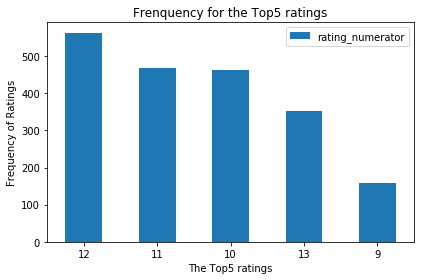

In [108]:
fig, ax = plt.subplots()
ax = df_top5_ratings.plot.bar(x=df_top5_ratings_numerator, y=df_top5_ratings_frenquency, rot=0)

ax.set_xlabel('The Top5 ratings')
ax.set_ylabel('Frequency of Ratings')
ax.set_title('Frenquency for the Top5 ratings')
ax.legend()

fig.tight_layout()
plt.show()

## Insight : 1

From the above barchart, we can see the most common ratings given by dog owners are 12, 10, 11, 13, 9 (After we converted all the rating_denominator to 10). There are around 150 ratings below 10.

## visualization 2

### Question 2
***Even most of the owners are satisfied with their dogs by giving the dog ratings above 10, but there are still around 150 ratings below 10. So we are curious about which stage dog make the owners happier?***

In [194]:
df['rating_numerator'].value_counts()

Series([], Name: rating_numerator, dtype: int64)

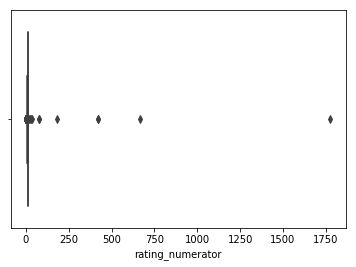

In [110]:
import seaborn as sns
sns.boxplot(df['rating_numerator'])

In [111]:
df['rating_numerator'].describe()

count    2356.000000
mean       12.228353
std        40.825625
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [112]:
# modify uncommon ratings(which is above 15) to 15
mask = df.rating_numerator > 15
column_name = 'rating_numerator'
df.loc[mask, column_name] = 15

In [114]:
df.sample(3).dog_stages

2004       NaN
2071       NaN
1615    pupper
Name: dog_stages, dtype: object

In [115]:
df_pupper = df[df['dog_stages']=="pupper"]
df_doggo = df[df['dog_stages']=="doggo"]
df_puppo = df[df['dog_stages']=="puppo"]
df_floofer = df[df['dog_stages']=="floofer"]
df_multiple = df[df['dog_stages']=="multiple"]

array_stages = [df_pupper,df_doggo, df_puppo,df_floofer, df_multiple]

In [116]:
def mean_std(array, factor):
    
    mean_stage = []
    std_stage = []
    max_stage = []
    min_stage = []
    
    for i in range(len(array)):
        mean_stage.append(array[i][factor].mean())
        std_stage.append(array[i][factor].std())
        max_stage.append(array[i][factor].max())
        min_stage.append(array[i][factor].min())
        
    return np.array(mean_stage), np.array(std_stage), np.array(max_stage), np.array(min_stage)

In [117]:
mean_stage, std_stage, max_stage, min_stage = mean_std(array_stages, 'rating_numerator')

In [118]:
mean_stage

array([ 10.80408163,  11.87951807,  12.10344828,  11.88888889,  11.35714286])

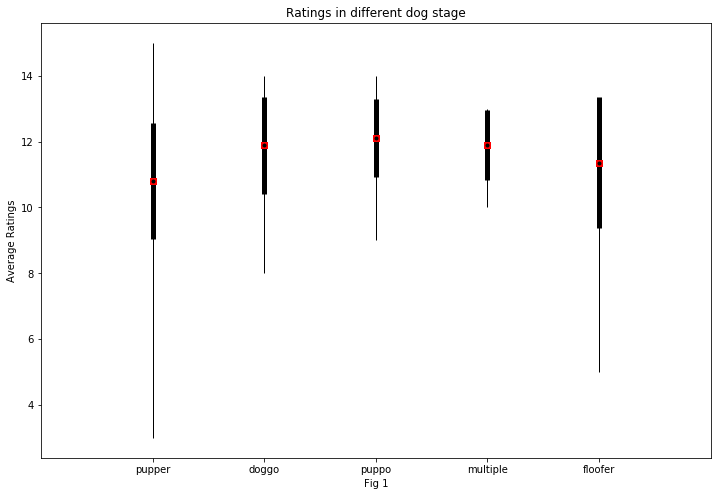

In [119]:
fig, ax = plt.subplots(figsize=(12,8))

plt.errorbar(np.arange(5), mean_stage, std_stage, fmt='ok', lw=5 ,mfc='green' , mec='red', ms=5, mew=2, marker="s")
plt.errorbar(np.arange(5), mean_stage, [mean_stage - min_stage, max_stage - mean_stage], fmt='.k',  lw=1)
plt.ylabel("Average Ratings")
plt.xlabel('Fig 1')
plt.title("Ratings in different dog stage")
plt.xlim(-1, 5)
plt.setp(ax, xticks=[y  for y in range(len(array_stages))],
         xticklabels=['pupper', 'doggo', 'puppo', 'multiple', 'floofer'])
plt.show()

**From Fig 1 we can see, the owners rate the dogs in doggo and puppo stage higher, give a rating to pupper the least.**


***People retweet and favorite a tweeter means they love the dog in the pic. So I am going to explore `num_of_retweets` and `num_of_favorites` to furtherly see which dog stage get more likes.***

In [120]:
df_retweets = df.num_of_retweets.dropna()
df_retweets.shape[0]

2263

In [121]:
df_favorites = df.num_of_favorites.dropna()
df_favorites.shape[0]

2263

In [122]:
means_retweet, stds_retweet, maxs_retweet, mins_retweet = mean_std(array_stages, 'num_of_retweets')

In [123]:
means_retweet

array([ 2615.92946058,  7059.48101266,  6092.78571429,  3895.        ,
        6118.23076923])

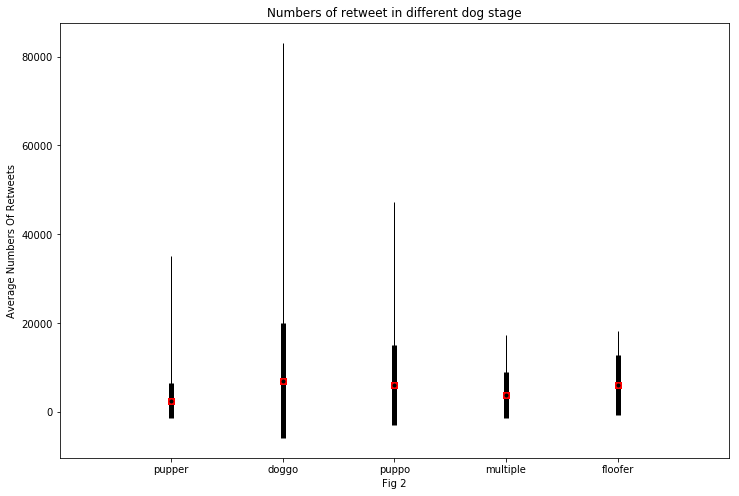

In [124]:
fig, ax = plt.subplots(figsize=(12,8))

plt.errorbar(np.arange(5), means_retweet, stds_retweet, fmt='ok', lw=5 ,mfc='green' , mec='red', ms=5, mew=2, marker="s")
plt.errorbar(np.arange(5), means_retweet, [means_retweet - mins_retweet, maxs_retweet - means_retweet], fmt='.k',  lw=1)
plt.ylabel("Average Numbers Of Retweets")
plt.xlabel('Fig 2')
plt.title("Numbers of retweet in different dog stage")
plt.xlim(-1, 5)
plt.setp(ax, xticks=[y  for y in range(len(array_stages))],
         xticklabels=['pupper', 'doggo', 'puppo', 'multiple', 'floofer'])
plt.show()

In [125]:
means_favorites, stds_favorites, maxs_favorites, mins_favorites = mean_std(array_stages, 'num_of_favorites')

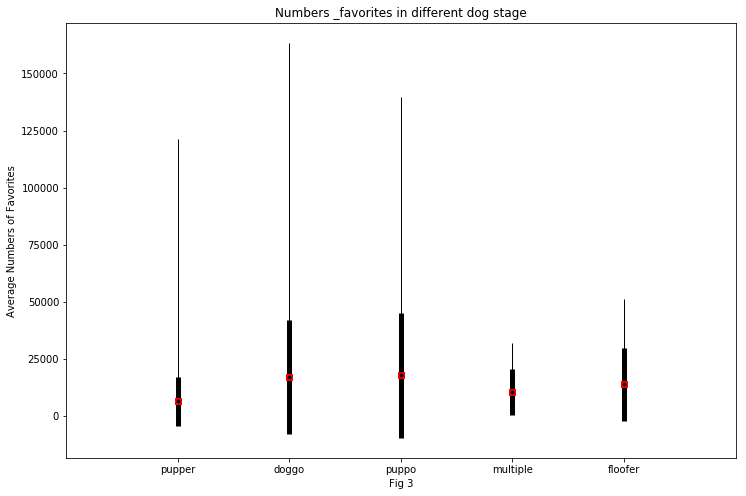

In [127]:
fig, ax = plt.subplots(figsize=(12,8))

plt.errorbar(np.arange(5), means_favorites, stds_favorites, fmt='ok', lw=5 ,mfc='green' , mec='red', ms=5, mew=2, marker="s")
plt.errorbar(np.arange(5), means_favorites, [means_favorites - mins_favorites, maxs_favorites - means_favorites], fmt='.k',  lw=1)
plt.ylabel("Average Numbers of Favorites")
plt.xlabel('Fig 3')
plt.title("Numbers _favorites in different dog stage")
plt.xlim(-1, 5)
plt.setp(ax, xticks=[y  for y in range(len(array_stages))],
         xticklabels=['pupper', 'doggo', 'puppo', 'multiple', 'floofer'])
plt.show()

## Insight 2:

**The above pictures(Fig1, Fig2 and Fig 3) indicate that people love dogs in doggo and puppo stage more than in other periods. The pupper is the least favorite dog stage. (Maybe they are too young to know the rules around people :P )**

### Question 3

***Which type of dog is the most difficult to recognize by an AI computer?***

In [211]:
df.columns

Index(['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'num_of_retweets',
       'num_of_favorites'],
      dtype='object')

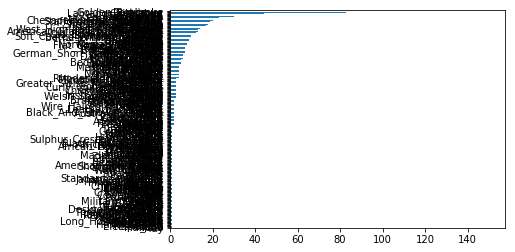

In [197]:
df.p1.value_counts().sort_values().plot(kind = 'barh')

In [276]:
df_breeds = df[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog']]

In [277]:
breeds_ = df_breeds.p1.value_counts()
df_breeds = pd.DataFrame(breeds_)

In [278]:
# df_breeds.reset_index()

The most dog breeds people have are Golden_Retriever, Labrador_Retriever, Pembroke, Chihuahua, Pug. We will look into those dogs prediction to check which dog breeds is predic                              

In [279]:
nums_true = []
means_conf = []
for key in breeds_.index:
    num_true = sum((df['p1'] == key) & (df['p1_dog']==True))
    df_conf=df[df['p1']==key]
    means_conf.append(df_conf.p1_conf.mean())
    nums_true.append(num_true)

In [280]:
df_breeds['nums_true'] = nums_true
df_breeds['acc'] = (df_breeds['nums_true'] / df_breeds['p1'])*100
df_breeds['ave_conf'] = means_conf
df_breeds.head()

,p1,nums_true,acc,ave_conf
Golden_Retriever,150,150,100.0,0.723555
Labrador_Retriever,100,100,100.0,0.666523
Pembroke,89,89,100.0,0.718256
Chihuahua,83,83,100.0,0.586888
Pug,57,57,100.0,0.757663


In [287]:
df_breeds.rename(columns={'p1': 'counts'}, inplace=True)

In [288]:
df_breeds.head(2)

,counts,nums_true,acc,ave_conf
Golden_Retriever,150,150,100.0,0.723555
Labrador_Retriever,100,100,100.0,0.666523


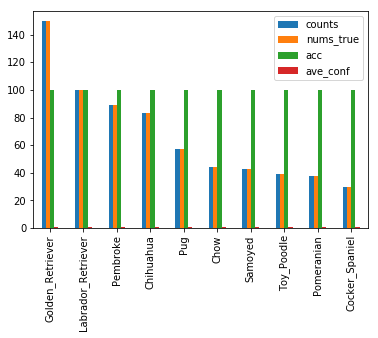

In [289]:
df_breeds.head(10).plot.bar()

## Insight 3

**The most dog breeds people have are Golden_Retriever, Labrador_Retriever, Pembroke, Chihuahua.**

**The prediction accuracy of these dog breeds are 100%.**

In [281]:
df_breeds.sort_values('ave_conf')

,p1,nums_true,acc,ave_conf
Clog,1,0,0.0,0.081101
Wooden_Spoon,1,0,0.0,0.082489
Desktop_Computer,1,0,0.0,0.086502
Egyptian_Cat,1,0,0.0,0.090508
Microphone,1,0,0.0,0.096063
Orange,1,0,0.0,0.097049
Bald_Eagle,1,0,0.0,0.097232
Banana,1,0,0.0,0.107317
Pitcher,1,0,0.0,0.117446
Sandbar,1,0,0.0,0.118154


In [282]:
df[df['p1']=='Carton'][['jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog']]

,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2015,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,Carton,0.952613,False,Pug,0.035376,False,Pug,0.003267,True


![Carton](https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg)

In [283]:
df[df['p1']=='Otter'][['jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog']]

,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1350,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,Otter,0.945537,False,Sea_Lion,0.018231,False,Sea_Lion,0.015861,False


![Otter](https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg)

## Insight 3

**The dog detector algorithm is awsome.**

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.


Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.



Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.